<a href="https://colab.research.google.com/github/jajoonaman/ML_DL_Work/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

It is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In [ ]:
import io
 
from google.colab import files
 
upload1 = files.upload()
upload2 = files.upload()

Saving train.csv to train.csv


Saving test.csv to test.csv


### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Reading the train and test Data

In [ ]:
train = pd.read_csv("train.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test = pd.read_csv("test.csv")

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Getting the train data info


1.   Shape
2.   Columns
3.   Data Types
4.   Description

In [ ]:
print("Shape: ", train.shape)

print("\nColumns: ", train.columns)

print("\nTypes: \n",train.dtypes)

print("\n",train.describe())

Shape:  (891, 12)

Columns:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Types: 
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

        PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.

### Looking into Missing Values

In [ ]:
# Seeing Missing values in data

# Total no. of values that are lost in the features
total = train.isnull().sum().sort_values(ascending=False)

# Percent of values that are lost
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)

# Observing the total missing values with there Percentage
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

             Total   Percent
Cabin          687  0.771044
Age            177  0.198653
Embarked         2  0.002245
Fare             0  0.000000
Ticket           0  0.000000
Parch            0  0.000000
SibSp            0  0.000000
Sex              0  0.000000
Name             0  0.000000
Pclass           0  0.000000
Survived         0  0.000000
PassengerId      0  0.000000


### Data Preprocessing

In [ ]:
# Fill by median

train['Age'] = train['Age'].fillna(value= train['Age'].median())
    
# Fill by mode

train['Embarked'] = train['Embarked'].fillna(value= train['Embarked'].mode())

# Remove Cabin Column

train = train.drop(['Cabin', 'Name', 'Ticket'], axis= 1)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### Label Encoding for the Object datatype

In [ ]:
c = train.Sex.unique()
for i in range(len(c)):
  train.Sex = train.Sex.replace(c[i], i+1)
train.Sex.unique()

array([1, 2])

In [ ]:
c = train.Embarked.unique()
for i in range(len(c)):
  train.Embarked = train.Embarked.replace(c[i], i+1)
train.Embarked.unique()

array([1., 2., 3., 4.])

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1.0
1,2,1,1,2,38.0,1,0,71.2833,2.0
2,3,1,3,2,26.0,0,0,7.9250,1.0
3,4,1,1,2,35.0,1,0,53.1000,1.0
4,5,0,3,1,35.0,0,0,8.0500,1.0


## Visualisation

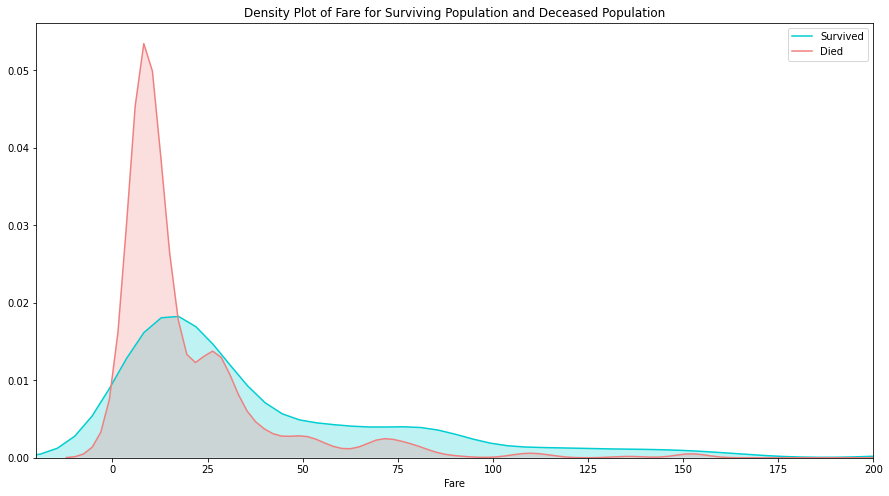

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train["Fare"][train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(train["Fare"][train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

#### Corelation HeatMap

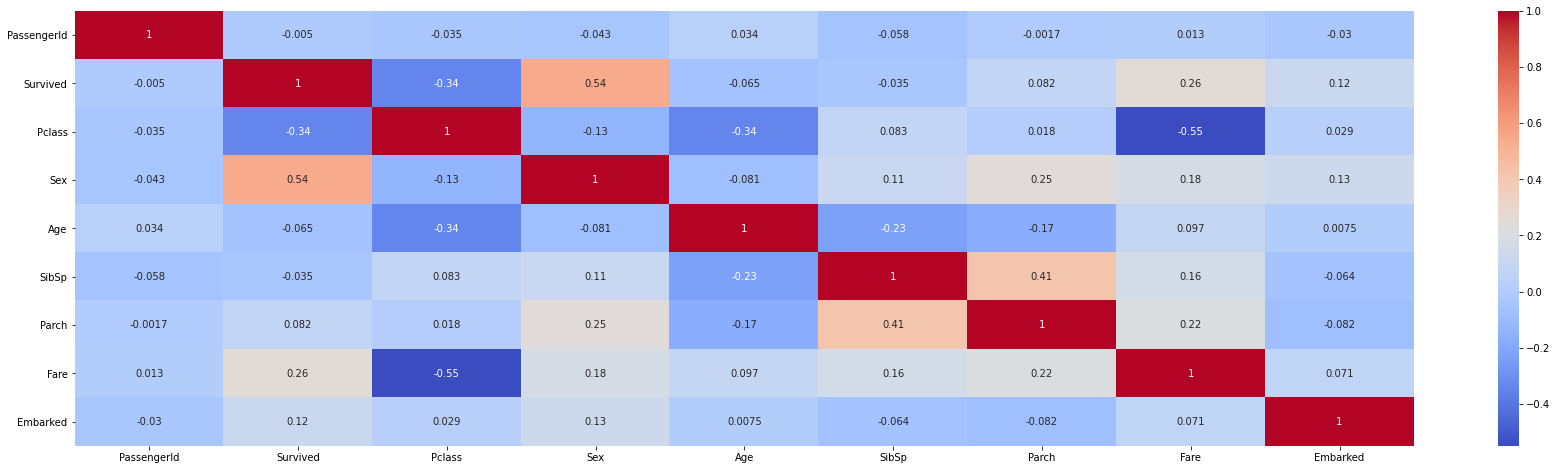

In [ ]:
plt.figure(figsize=(30,8))
sns.heatmap(train.corr(),cmap='coolwarm',annot = True)
plt.show()

In [ ]:
train.corr()["Survived"].sort_values(ascending=False) 

Survived       1.000000
Sex            0.543351
Fare           0.257307
Embarked       0.118026
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Pclass        -0.338481
Name: Survived, dtype: float64

In [ ]:
# Dropping all the columns which has negative corelation

drop_col = ['PassengerId', 'SibSp', 'Age', 'Pclass']

train = train.drop(drop_col, axis=1)

train.head()

,Survived,Sex,Parch,Fare,Embarked
0,0,1,0,7.2500,1.0
1,1,2,0,71.2833,2.0
2,1,2,0,7.9250,1.0
3,1,2,0,53.1000,1.0
4,0,1,0,8.0500,1.0


### Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.3, random_state= 0)

#### Applying the model

In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

# Fitting 
log.fit(X_train, y_train)

# Predicting
y_pred = log.predict(X_test)

### Check for accuracy

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score
from math import sqrt


# Check accuracy
print('Accuracy:',accuracy_score(y_test, y_pred)) 

# Check Root mean squared error
print('RMSE:', sqrt(mean_squared_error(y_test, y_pred)))

Accuracy: 0.7947761194029851
RMSE: 0.4530164242022743


### Applying all the same transformation for the test data set as well

In [ ]:
print("Shape: ", test.shape)

print("\nColumns: ", test.columns)

print("\nTypes: \n",test.dtypes)

print("\n",test.describe())

Shape:  (418, 11)

Columns:  Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Types: 
 PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

        PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.45420

In [ ]:
# Seeing Missing values in data

# Total no. of values that are lost in the features
total = test.isnull().sum().sort_values(ascending=False)

# Percent of values that are lost
percent = ((test.isnull().sum()/test.isnull().count())*100).sort_values(ascending=False)

# Observing the total missing values with there Percentage
missing_data_test = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data_test)

             Total    Percent
Cabin          327  78.229665
Age             86  20.574163
Fare             1   0.239234
Embarked         0   0.000000
Ticket           0   0.000000
Parch            0   0.000000
SibSp            0   0.000000
Sex              0   0.000000
Name             0   0.000000
Pclass           0   0.000000
PassengerId      0   0.000000


Here we can observe that we donot have our target class in this.
So, we have to predict the target class for our test data set.

In [ ]:
test_data = test.copy()
# Fill by median

test_data['Age'] = test_data['Age'].fillna(value= test_data['Age'].median())

test_data['Fare'] = test_data['Fare'].fillna(value= test_data['Fare'].median())

# Remove Cabin, Name, Ticket Column

test_data = test_data.drop(['Cabin', 'Name', 'Ticket'], axis= 1)

test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [ ]:
e = test_data.Embarked.unique()
for i in range(len(e)):
  test_data.Embarked = test_data.Embarked.replace(e[i], i+1)
test_data.Embarked.unique()

array([1, 2, 3])

In [ ]:
d = test_data.Sex.unique()
for i in range(len(d)):
  test_data.Sex = test_data.Sex.replace(d[i], i+1)
test_data.Sex.unique()

test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,2,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,2,22.0,1,1,12.2875,2


In [ ]:
drop_col = ['PassengerId', 'SibSp', 'Age', 'Pclass']

test_data = test_data.drop(drop_col, axis=1)

test_data.head()

,Sex,Parch,Fare,Embarked
0,1,0,7.8292,1
1,2,0,7.0000,2
2,1,0,9.6875,1
3,1,0,8.6625,2
4,2,1,12.2875,2


In [ ]:
Prediction = log.predict(test_data)

In [ ]:
Prediction = pd.DataFrame(Prediction, columns=['Survived'])

Id = test['PassengerId']

submission = pd.concat([Id, Prediction], axis=1)

submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
